# Step7 演習01 教師なし学習 k平均法とPCA
---

Step7では、教師なし学習で有名なk平均法と主成分分析(PCA)を実装します。

**はじめに**
- for文やwhile文の利用は明示的な利用指示がない場所での使用は避けてください。

**本演習の目的**
- 教師なし学習のk平均法を実装する。
- 教師なし学習のk主成分分析を実装する。

## k平均法
まず、k平均法をscikit-learnを使わず、主にnumpyを使って実装してみましょう。

## ライブラリのインポート

まずはじめに、利用するライブラリのインポートを行います。

- [numpy](http://www.numpy.org) 数値計算を行うための基本パッケージの公式ドキュメント

ドキュメントには有用な情報が書き記されています。何か迷ったときには必ずドキュメントに戻ってくるようにしましょう。

次のセルをそのまま実行（"SHIFT" + "ENTER"）してください。コードが書いてあるセルは**上から順番に**順次実行してください。

** 注意： **初めてmatplotlibを使うユーザーは、フォント一覧のキャッシュが存在しないため、このセルの実行でWarningが出ます。もう一度実行すると、すでにキャッシュができているので、Warningなく走ります。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
font = {'family':'IPAexGothic'}
plt.rc('font', **font)
import numpy as np
from sklearn import datasets #サンプルデータの生成にのみscikit-learnを使います
import os

### k平均法に使うサンプルデータを生成
実装したk平均法のコードを試すためのサンプルデータを最初に生成しておきます。一度生成したら同じものを毎回使えるように、データをCSVファイル(Comma-Separated Values コンマで区切られたデータ)で保存しておきます。新たなデータを使いたいときは、CSVファイルの名前を変えるか、コードを変えましょう。

In [2]:
if not os.path.isdir("./dataStep7"):
    os.makedirs("./dataStep7")

if os.path.isfile("./dataStep7/dataStep7_1.csv") == True:
    X = np.loadtxt("./dataStep7/dataStep7_1.csv", delimiter = ",")

else:
    X, y = datasets.make_blobs(n_samples=300, n_features=2,centers=3,cluster_std=1.0,center_box=(4,10), random_state=1)
    #教師なし学習なのでyは要らない
    np.savetxt("./dataStep7/dataStep7_1.csv", X, delimiter=",")

上のセルを実行したことによりデータセットを ** X **と** y ** に格納しました。下のセルを実行してshapeを確認しましょう。

In [3]:
X.shape

(300, 2)

### 生成したデータの表示
視覚化は大切です。逐一視覚化していきましょう。

In [4]:
def plotData(X, idx=np.ones(X.shape[0],dtype=float)):
    map = plt.get_cmap("rainbow")
    idxn = idx.astype("float") / max(idx.astype("float"))
    colors = map(idxn)
    plt.scatter(X[:, 0], X[:, 1], 15, marker="o", c=colors, edgecolors=colors)
    plt.draw()

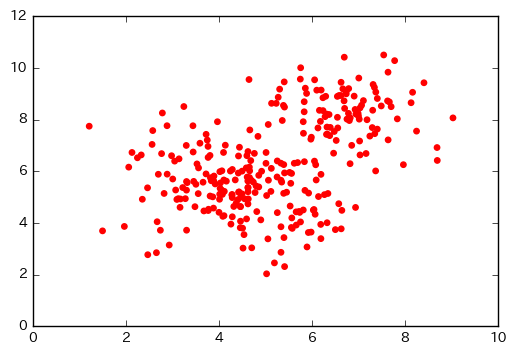

In [5]:
plotData(X)

### まずは適当に重心(centroid)を置いてみる
**【課題1】**これから3つのクラスタに分けたいので、訓練集合の中からランダムに3個のデータを取ってくるコードを書きましょう。次回以降使えるように、K個のデータを取ってくる関数`InitCentroids(X, K)`を実装しておき、それを呼び出す形にしてください。

In [12]:
#Coursemale-02 Step7 QuestionNumber1 d4089e3ec15b18a26e68e677435cd077
def InitCentroids(X, K):
###############ここを穴埋めしてください###############
    m, n = X.shape
    idx = np.random.permutation(np.arange(m))
    centroids = X[idx[:K],:]
    return centroids
######################################################

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [13]:
%%bash
./validation_client.py male-02 7 1 Step7_01.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



In [14]:
centroids = InitCentroids(X, 3)
print(centroids)

[[4.4930228  5.13331729]
 [4.53663464 3.55386238]
 [3.72158853 7.43684452]]


### 重心をプロットする
選んだ重心をデータに重ねてプロットしてみましょう。この関数はk平均法の繰り返しによる変化を観察するのに使います。

In [15]:
def plotProgress(X, centroids, idx=np.ones(X.shape[0],dtype=float)):
    plt.hold(True)
    plotData(X, idx)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="x",s=200,linewidths=4, c="g")
    plt.show()

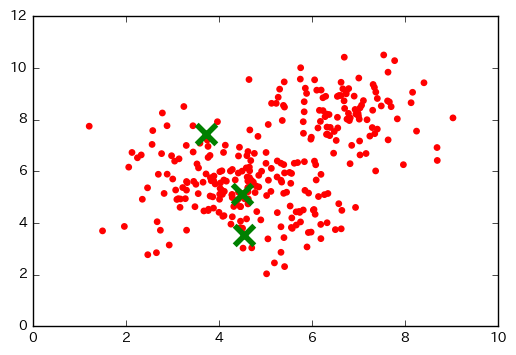

In [16]:
plotProgress(X,centroids)

### 最も近い重心を探す
**【課題2】**
各訓練例に対して最も近い重心を返す関数`findClosestCentroids(X, centroids)`をコーディングしましょう。訓練例がm個のとき、返す値はshapeが`(m,)`の配列、各要素はその訓練例が何番目の重心に近いかが書かれているようにしましょう。

In [17]:
#Coursemale-02 Step7 QuestionNumber2 2c5bfcd0d61cabe25ef0ef98f3ab3e6a
def findClosestCentroids(X, centroids):
    K,_ = centroids.shape
    m, n = X.shape
    idx = np.empty(m, dtype=int)
###############ここを穴埋めしてください###############
    for i in range(m):
        norm = np.empty(K)
        for j in range(K):
            norm[j] = np.linalg.norm(X[i,:] - centroids[j,:])
        idx[i] = np.argmin(norm)
######################################################
    return idx

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [18]:
%%bash
./validation_client.py male-02 7 2 Step7_01.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



課題2の結果をプロットしてみます。

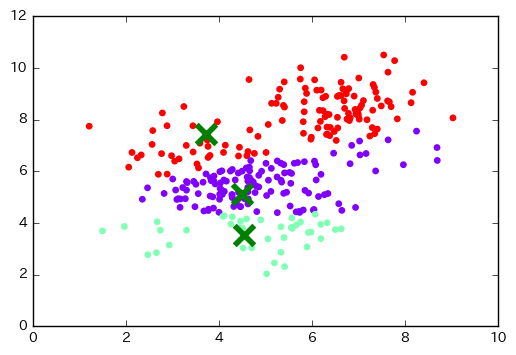

In [19]:
idx = findClosestCentroids(X, centroids)
plotProgress(X,centroids,idx)

#### （発展）`findClosestCentroids(X, centroids)`を内包表記で実装してみよう
これまでも度々「別解」として示してきたように、Pythonではリストの書き方として内包表記という手法がありました。最初に変数を宣言して領域を確保した後for文をまわすのではなく、後ろにforをつけてやるだけで同様のリストが生成できます。for文で書くよりも高速になるケースもあり、上手く使えばシンプルに書けるので、今回は「別解」として流し読みするのではなく、しっかり慣れておきましょう。

以下は`findClosestCentroids(X, centroids)`を一部内包表記で実装した例です。

In [20]:
def findClosestCentroids(X, centroids):
    K,_ = centroids.shape
    m, n = X.shape
    idx = np.empty(m, dtype=int)
    for i in range(m):
        norm = np.array([np.linalg.norm(X[i,:]-centroids[j,:]) for j in range(centroids.shape[0])])
        idx[i] = np.argmin(norm)

    return idx

２回内包表記を使うと次のように一行で書くこともできます。ここまでやってしまうと括弧が増えて読みにくいためお薦めできませんが、時々内包表記を使って慣れておきましょう。

In [21]:
def findClosestCentroids(X, centroids):
    return np.array([np.argmin([np.linalg.norm(x-cent) for cent in centroids]) for x in X])

### 次に重心を移すべき点を計算
k平均法の名の由来の通り、重心はそのクラスタのデータの平均へと動かしていきます。

**【課題3】**各クラスタのデータの平均を求める関数`computeClusterMeans(X, idx)`を書きましょう。返値は`centroids`と同じshapeの配列になるはずです。

In [26]:
#Coursemale-02 Step7 QuestionNumber3 0a24e86b5635a145a618044e33ff9b14
def computeClusterMeans(X, idx):
    m, n = X.shape
###############ここを穴埋めしてください###############
    K = idx.max()+1
    clusterMeans = np.array([X[idx==i,:].mean(axis=0) for i in range(K)])
######################################################
    return clusterMeans[~np.isnan(clusterMeans).any(axis=1)] #nanを含む行は除外して返す

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [27]:
%%bash
./validation_client.py male-02 7 3 Step7_01.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



**課題３の注意：**

もしある重心が何れの訓練集合からも遠いところに置かれるなどして、どの訓練例もその重心のクラスタに所属しなかった場合、次に重心を移すべき点を計算することができません。この場合、もう一度ランダム初期化を行い一からやり直すか、そのクラスタをなくし重心の個数を減らす必要があります。後者のケースは、課題３の最後の行`~np.isnan(clusterMeans).any(axis=1)`によって実現されています。

### 重心の移動
計算した平均に重心を移動させ、その様子をプロットしましょう。もしデータ無しのクラスタがあった場合、重心の数は減ります。

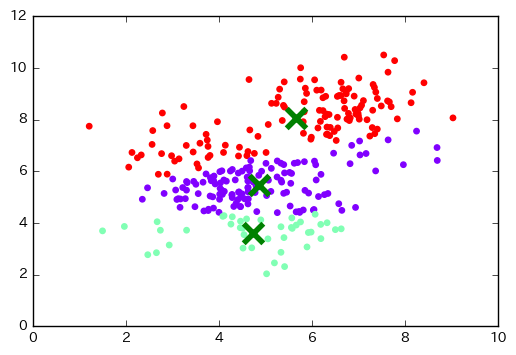

In [28]:
centroids = computeClusterMeans(X, idx)
plotProgress(X,centroids,idx)

### これを繰り返す
あとはこの繰り返しです。

**【課題4】** 初期化を行い、k平均法の繰り返しを5回行うプログラムを書きましょう。各繰り返しでその変化が分かるようにプロットしましょう。

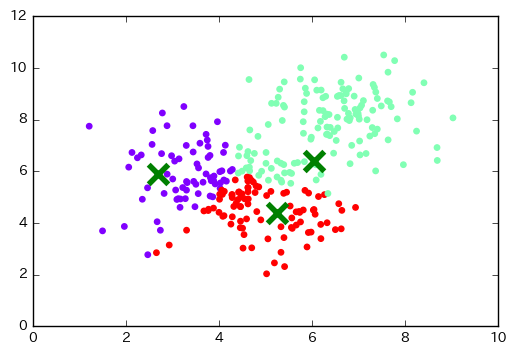

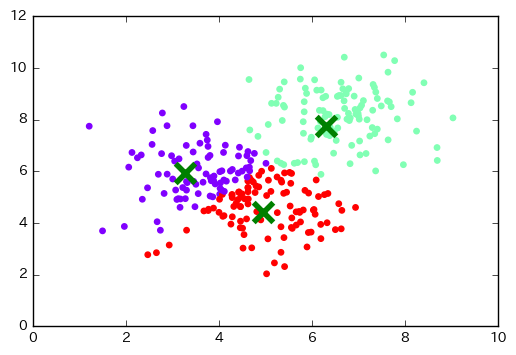

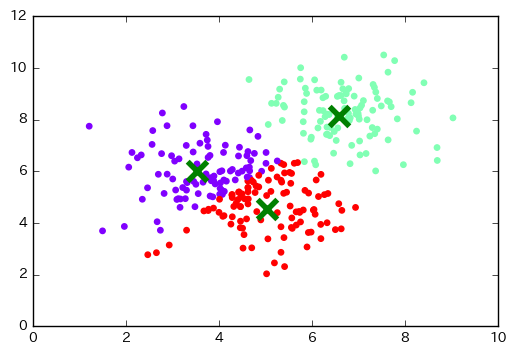

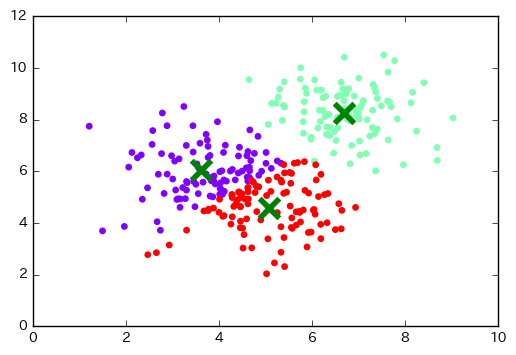

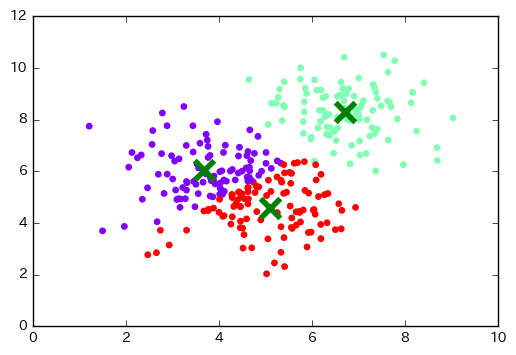

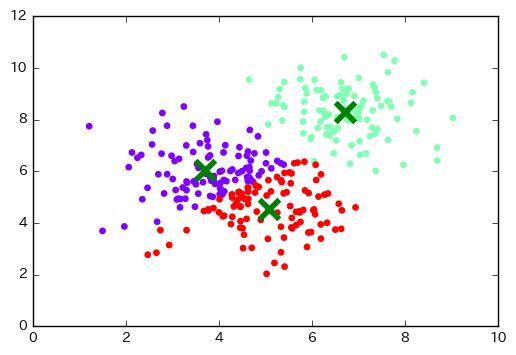

In [29]:
#Coursemale-02 Step7 QuestionNumber4 6661c4e37afb9c74062aa5f0b179c0ac
###############ここを穴埋めしてください###############
centroids = InitCentroids(X, 3)
idx = findClosestCentroids(X, centroids)
plotProgress(X,centroids,idx)
for i in range(1,6):
    centroids = computeClusterMeans(X, idx)
    idx = findClosestCentroids(X, centroids)
    plotProgress(X,centroids,idx)
######################################################

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [30]:
%%bash
./validation_client.py male-02 7 4 Step7_01.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



### 収束判定
重心がほとんど動かなくなったら収束したと言える。

**【課題5】** 収束するまでk平均法の繰り返しを行う関数を自由に実装してください。また、その関数を使って収束した状態をプロットしてください。

In [31]:
#Coursemale-02 Step7 QuestionNumber5 f285a1dcff36395ab0dd7396fb592808
def runKmeans(X, K_init, epsilon, max_iter):
###############ここを穴埋めしてください###############
    centroids_previous = InitCentroids(X, K_init)
    idx = findClosestCentroids(X, centroids_previous)
    centroids = computeClusterMeans(X, idx)
    idx = findClosestCentroids(X, centroids)
    num_iter = 0
    while np.linalg.norm(centroids - centroids_previous, axis=1).mean() > epsilon and num_iter < max_iter:
        centroids_previous = centroids_previous
        centroids = computeClusterMeans(X, idx)
        idx = findClosestCentroids(X, centroids)
        num_iter += 1
    return (centroids, idx)
######################################################

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [32]:
%%bash
./validation_client.py male-02 7 5 Step7_01.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



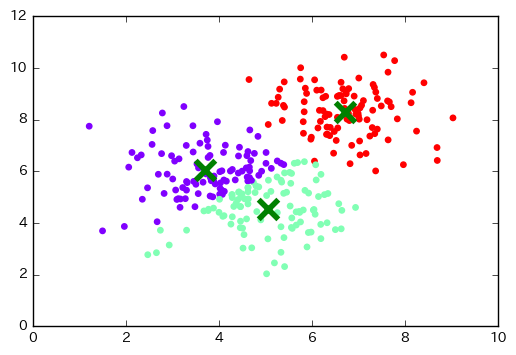

In [33]:
centroids, idx = runKmeans(X, 3, 1e-20, 300)
plotProgress(X,centroids,idx)

---
### scikit-learnを用いたk平均法の実装
お疲れさまでした。これで、皆さんはk平均法を一から実装することができました。これを自分のライブラリとしてストックしておいて、実用的に使っていけばいいわけです。

しかし、もしかしたら特殊な状況下で発生する何らかのバグが入っているかもしれません。スペシャリストが作り、皆が寄って集って実践と共にバグを潰しているライブラリを使った方が、安全でしょう。また、有名なライブラリは徹底的に最適化をかけていることが多いため、多くの場合高速に走ります。

これまでも使ってきた著名な機械学習ライブラリであるscikit-learnで、k平均法を実装してみましょう。

scikit-learnのk平均法は、デフォルトでk-means++という2007年に開発されたk平均法の亜種を利用しています。このアルゴリズムは、普通のk平均法よりとても早く収束することが知られています。

参考：
[scikit-learnチュートリアル sklearn.cluster.KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [34]:
import sklearn.cluster as skc

scikit-learnはAPIに統一感があり、ロジスティック回帰などとほとんど変わらず実装していくことができます。

まずはインスタンスを作成します。

In [35]:
estimator = skc.KMeans(n_clusters=3, n_jobs=-1) #n_jobs=-1でCPUの全コア利用。デフォルトでは1コア利用。

そして学習（訓練集合に対して目的関数を最小化）します。つまり、k平均法の繰り返しを行います。

In [36]:
estimator.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

そして、どのクラスタに配属されたか見てみます。

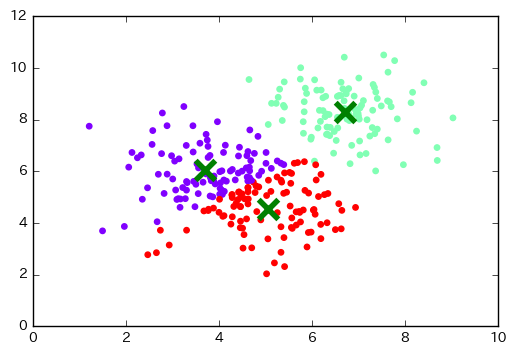

In [37]:
idx = estimator.predict(X)
centroids = estimator.cluster_centers_
plotProgress(X,centroids,idx)

---
### k平均法を用いた画像の圧縮
では、k平均法を用いて画像を圧縮してみましょう。

In [38]:
import scipy.misc as scm

サンプル用の画像データをいくつか/dataStep8ディレクトリに置いてあります。その他、どんな画像でもよいのでお好みで差し替えてください。

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


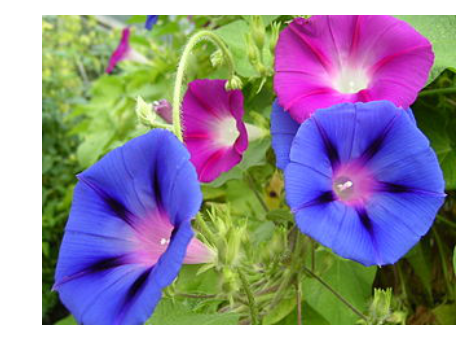

In [39]:
A = scm.imread("./dataStep7/Asagao.jpg").astype(np.float32)/255
#intで0から255で表現するのではなく、float64で0から1で表現することで、k平均法フィッティング時の型関係のトラブルを回避。
#しかしメモリ節約にはならない。気になる人はもっとよい方法を考えよう。

plt.axis("off")
plt.imshow(A)

Aは縦、横、カラー(RGB)の３次元の配列でなっています。

In [40]:
img_size = A.shape
print(img_size)

(240, 320, 3)


この縦、横の部分をフラットにして2次元配列にします。

In [41]:
Aflatten = A.reshape(img_size[0]*img_size[1], 3)

これをk平均法でクラスタリングしましょう。K個のクラスタに分けると、似たような種類は一色にまとめられ、K種類の色だけで画像が表現されるようになります。もともと256×256×256色で各ピクセルが表現されていたわけですから、大幅に容量を減らせることになります。

**【課題6】** クラスタの数K=30として、クラスタリングしてください。ライブラリはscikit-learnを使いましょう。これによって、30色それぞれのRGBの値(`color_centroids`)、各ピクセルがそのうちのどの色に該当するか(`color_idx`)を得ることができます。計算には多少時間がかかります。

In [42]:
#Coursemale-02 Step7 QuestionNumber6 1ee4296517613f612803612c812d14a1
###############ここを穴埋めしてください###############
#適切な 関数・変数・値 などにNoneを書き換えてください。
K = 30
estimator_pic = skc.KMeans(n_clusters=K, n_jobs=-1)
estimator_pic.fit(Aflatten)
color_idx = estimator_pic.predict(Aflatten)
color_centroids = estimator_pic.cluster_centers_
######################################################

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [43]:
%%bash
./validation_client.py male-02 7 6 Step7_01.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



**【課題7】** `color_centroids`と`color_idx`を用いて元の画像を復元しましょう。その画像を表示してみましょう。

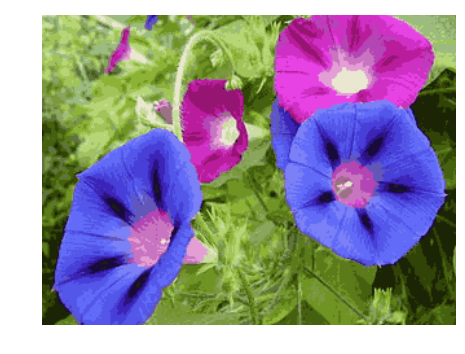

In [44]:
#Coursemale-02 Step7 QuestionNumber7 6854de7c4e1508098b56b92187a28bbd
###############ここを穴埋めしてください###############
#適切な 関数・変数・値 などにNoneを書き換えてください。
Aflatten_recovered = np.array([color_centroids[i] for i in color_idx])
A_recovered = Aflatten_recovered.reshape(img_size)
plt.axis("off")
plt.imshow(A_recovered)
######################################################

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [45]:
%%bash
./validation_client.py male-02 7 7 Step7_01.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



### 発展課題
**【発展課題】（課題８）** クラスタの数$K$を変えつつ、その結果の画像を順番に並べてみましょう。また、別の画像を用いてみましょう。画像によって最適なKが変わってくることが分かると思います。

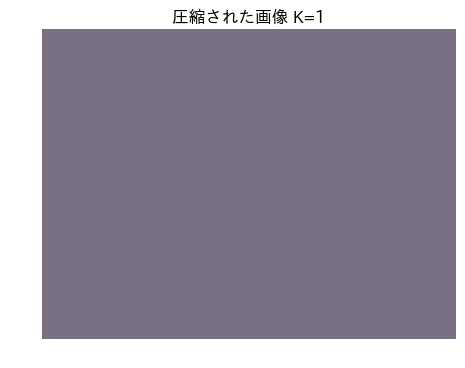

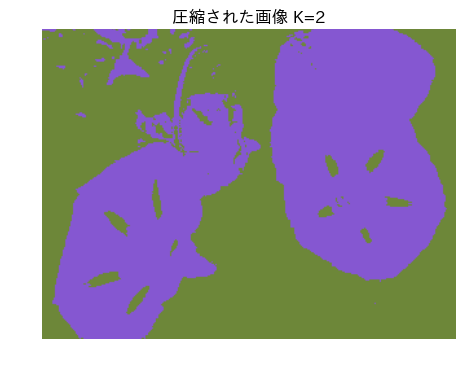

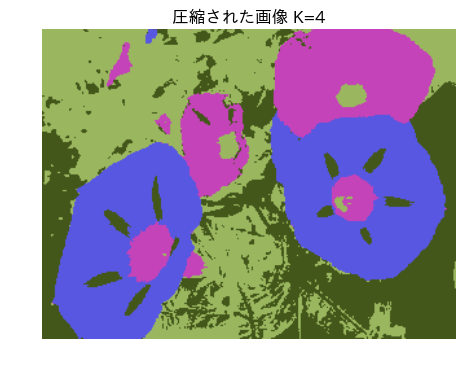

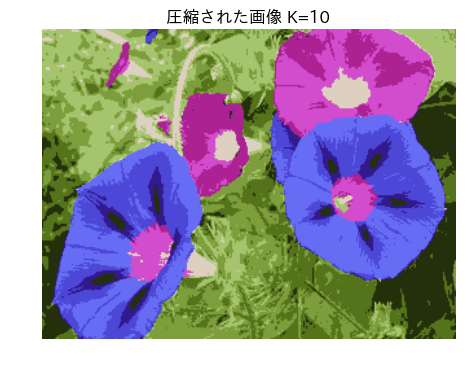

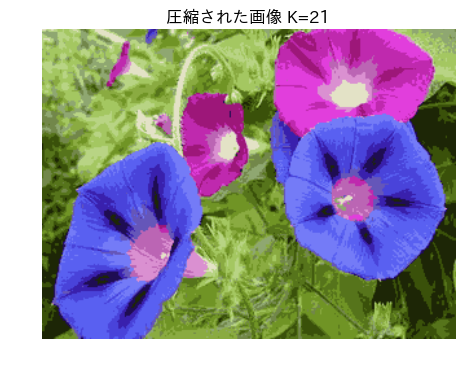

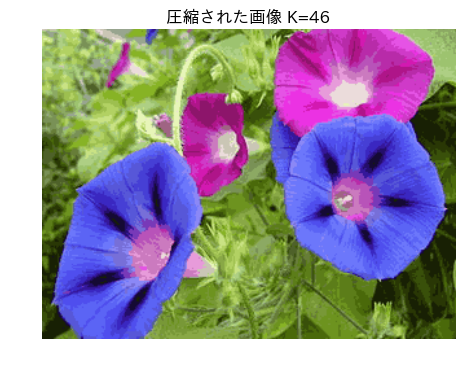

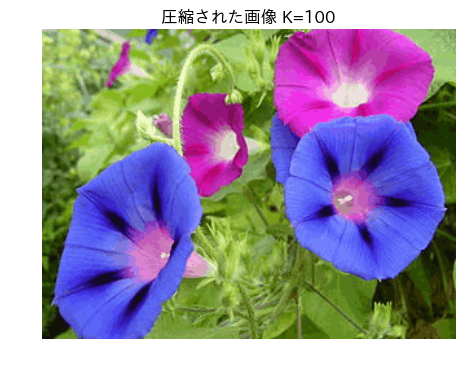

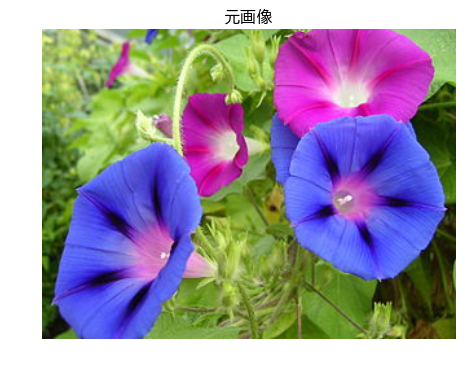

In [46]:
#Coursemale-02 Step7 QuestionNumber8 e8b3c99112cba55f622799741bf45aba
K_num = 7
K_list =np.logspace(0,2,K_num,dtype=int)

###############ここを穴埋めしてください###############
#適切な 関数・変数・値 などにNoneを書き換えてください。
for i in range(K_num):
    estimator_pic = skc.KMeans(n_clusters=K_list[i], n_jobs=-1)
    estimator_pic.fit(Aflatten)
    color_idx = estimator_pic.predict(Aflatten)
    color_centroids = estimator_pic.cluster_centers_
    Aflatten_recovered = np.array([color_centroids[i] for i in color_idx])
    A_recovered = Aflatten_recovered.reshape(img_size)

    plt.axis("off")
    plt.title(u"圧縮された画像 K="+str(K_list[i]))
    plt.imshow(A_recovered)
    plt.show()
######################################################
plt.axis("off")
plt.title(u"元画像")
plt.imshow(A)
plt.show()

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [47]:
%%bash
./validation_client.py male-02 7 8 Step7_01.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



**課題８ 注**

別の画像を用いる例は採点しません。各自違うファイルを使って試してみて下さい。サンプル画像は./dataStep8内にいくつか置いてあります。自分で選んだ画像を用いたいときはファイル選択画面からUploadしてください。